## Problem Statement

Mr. Ambani wants to create the guest list for his daughter’s marriage. He doesn’t want to leave out rich people from the city. But he also doesn’t want to call a lot of people.
You, a data scientist at Reliance, are given the task to make sure his invite list is concise yet including most of the rich people in the city. 

The problem is you do not have an account for people’s income. Your market research team was able to gather income data for roughly 50,000 people identifying them as rich (Income > $50k/year) or not rich (Income < $50k/year).
Train a model based on this data which will then be used to create the entire invite list. For each person, you have identified 14 attributes based on which you will have to identify them as rich or poor.
The criteria Mr. Ambani has set is ‘roughly 90% rich of all the rich people in the city must be on the invite list’. A winning model would be one which reduces the total invitees satisfying the criteria.

## Dataset Information http://mlr.cs.umass.edu/ml/datasets/Adult

Attribute Information:

Listing of attributes:

">50K, <=50K."

age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Importing Data

In [2]:
columns = ['Age','Workclass','fnlgwt','Education','Education Num','Marital Status',
           'Occupation','Relationship','Race','Sex','Capital Gain','Capital Loss',
           'Hours/Week','Country','Income']
df = pd.read_csv("http://mlr.cs.umass.edu/ml/machine-learning-databases/adult/adult.data",1,",",names=columns)


In [3]:
df.head()

,Age,Workclass,fnlgwt,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.describe()

,Age,fnlgwt,Education Num,Capital Gain,Capital Loss,Hours/Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age               32561 non-null int64
Workclass         32561 non-null object
fnlgwt            32561 non-null int64
Education         32561 non-null object
Education Num     32561 non-null int64
Marital Status    32561 non-null object
Occupation        32561 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Sex               32561 non-null object
Capital Gain      32561 non-null int64
Capital Loss      32561 non-null int64
Hours/Week        32561 non-null int64
Country           32561 non-null object
Income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Exploring Data

In [6]:
df.Workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [7]:
df['Marital Status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital Status, dtype: int64

In [8]:
df.Occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [9]:
df.Relationship.value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

In [10]:
df.Race.value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [11]:
df.Country.value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

## Finding and removing Missing Values

In [12]:
col_names = df.columns
num_data = df.shape[0]
for c in col_names:
    num_non = df[c].isin([" ?"]).sum()
    if num_non > 0:
        print (c)
        print (num_non)
        print ("{0:.2f}%".format(float(num_non) / num_data * 100))
        print ("\n")

Workclass
1836
5.64%


Occupation
1843
5.66%


Country
583
1.79%




In [13]:
df = df[df["Workclass"] != " ?"]
df = df[df["Occupation"] != " ?"]
df = df[df["Country"] != " ?"]


In [14]:
df.isnull().sum()

Age               0
Workclass         0
fnlgwt            0
Education         0
Education Num     0
Marital Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital Gain      0
Capital Loss      0
Hours/Week        0
Country           0
Income            0
dtype: int64

## Findinf Coorelations

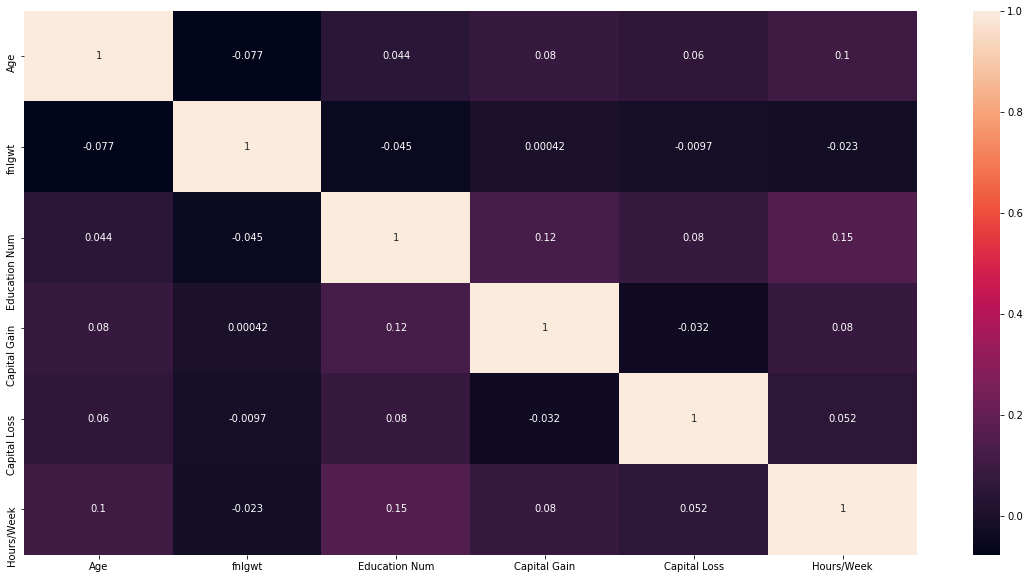

In [15]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

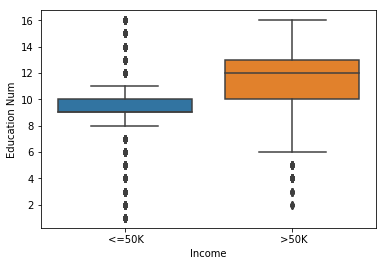

In [16]:
sns.boxplot(x='Income', y='Education Num', data=df)
plt.show()

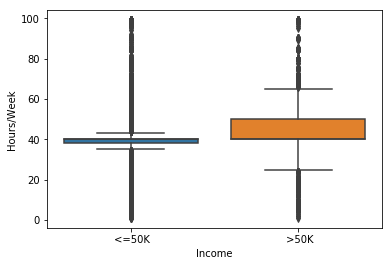

In [17]:
sns.boxplot(x='Income', y='Hours/Week', data=df)
plt.show()

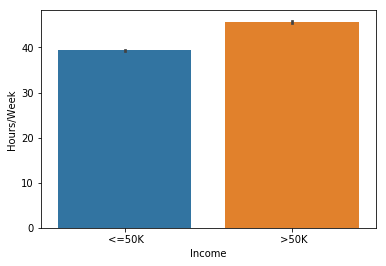

In [18]:
sns.barplot(x='Income', y='Hours/Week', data=df)
plt.show()

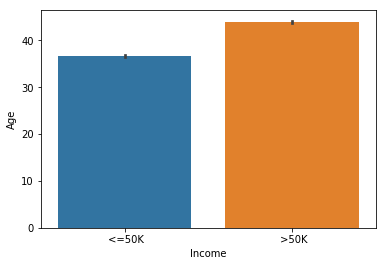

In [19]:
sns.barplot(x='Income', y='Age', data=df)
plt.show()

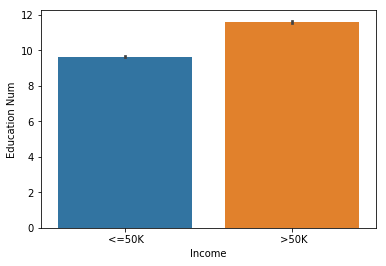

In [20]:
sns.barplot(x='Income', y='Education Num', data=df)
plt.show()

In [21]:
data = [df]
for dataset in data:
    dataset.loc[dataset['Country'] != ' United-States', 'Country'] = 'Non-US'
    dataset.loc[dataset['Country'] == ' United-States', 'Country'] = 'US'
df['Country'] = df['Country'].map({'US':1,'Non-US':0}).astype(int)

In [22]:
df['Income']=df['Income'].map({' <=50K':1,' >50K':0}).astype(int)
df['Sex']=df['Sex'].map({' Male':1,' Female':0}).astype(int)

In [23]:
df.head()

,Age,Workclass,fnlgwt,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,1,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,1,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,1,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,1,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,0,1


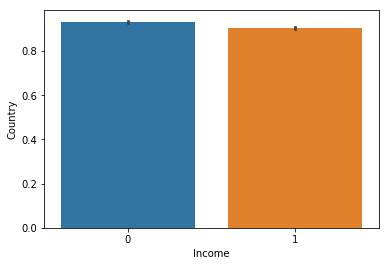

In [24]:
sns.barplot(x='Income', y='Country', data=df)
plt.show()

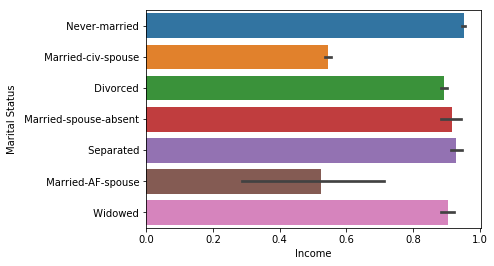

In [25]:
sns.barplot(x='Income', y='Marital Status', data=df)
plt.show()

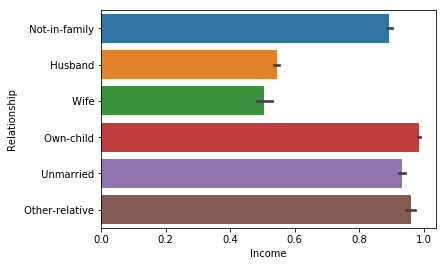

In [26]:
sns.barplot(x='Income', y='Relationship', data=df)
plt.show()

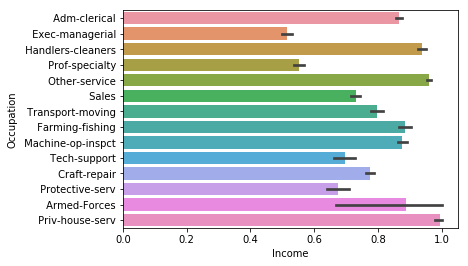

In [27]:
sns.barplot(x='Income', y='Occupation', data=df)
plt.show()

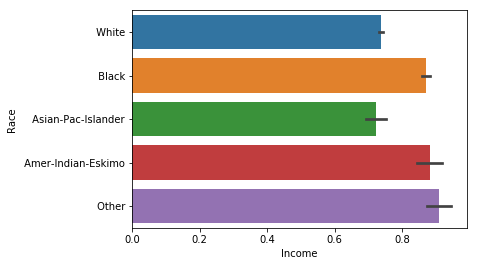

In [28]:
sns.barplot(x='Income', y='Race', data=df)
plt.show()

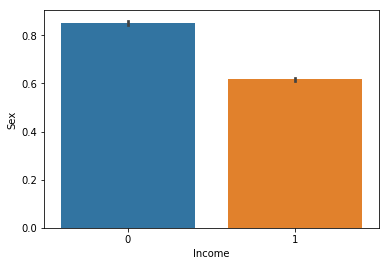

In [29]:
sns.barplot(x='Income', y='Sex', data=df)
plt.show()

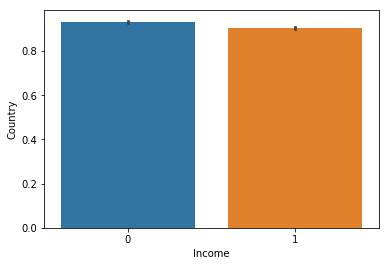

In [30]:
sns.barplot(x='Income', y='Country', data=df)
plt.show()

## One Hot Label Encoding Variables

In [31]:
df = pd.concat([df, pd.get_dummies(df['Workclass'],prefix='Workclass',prefix_sep=':')], axis=1)
df.drop('Workclass',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['Marital Status'],prefix='Marital Status',prefix_sep=':')], axis=1)
df.drop('Marital Status',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['Occupation'],prefix='Occupation',prefix_sep=':')], axis=1)
df.drop('Occupation',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['Relationship'],prefix='Relationship',prefix_sep=':')], axis=1)
df.drop('Relationship',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['Race'],prefix='Race',prefix_sep=':')], axis=1)
df.drop('Race',axis=1,inplace=True)



In [32]:
df.head()

,Age,fnlgwt,Education,Education Num,Sex,Capital Gain,Capital Loss,Hours/Week,Country,Income,...,Relationship: Not-in-family,Relationship: Other-relative,Relationship: Own-child,Relationship: Unmarried,Relationship: Wife,Race: Amer-Indian-Eskimo,Race: Asian-Pac-Islander,Race: Black,Race: Other,Race: White
0,39,77516,Bachelors,13,1,2174,0,40,1,1,...,1,0,0,0,0,0,0,0,0,1
1,50,83311,Bachelors,13,1,0,0,13,1,1,...,0,0,0,0,0,0,0,0,0,1
2,38,215646,HS-grad,9,1,0,0,40,1,1,...,1,0,0,0,0,0,0,0,0,1
3,53,234721,11th,7,1,0,0,40,1,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,Bachelors,13,0,0,0,40,0,1,...,0,0,0,0,1,0,0,1,0,0


In [33]:
#from sklearn.preprocessing import StandardScaler

#sc = StandardScaler()
#df = sc.fit_transform(df)

In [34]:
#df = pd.DataFrame(df)
df.head()

,Age,fnlgwt,Education,Education Num,Sex,Capital Gain,Capital Loss,Hours/Week,Country,Income,...,Relationship: Not-in-family,Relationship: Other-relative,Relationship: Own-child,Relationship: Unmarried,Relationship: Wife,Race: Amer-Indian-Eskimo,Race: Asian-Pac-Islander,Race: Black,Race: Other,Race: White
0,39,77516,Bachelors,13,1,2174,0,40,1,1,...,1,0,0,0,0,0,0,0,0,1
1,50,83311,Bachelors,13,1,0,0,13,1,1,...,0,0,0,0,0,0,0,0,0,1
2,38,215646,HS-grad,9,1,0,0,40,1,1,...,1,0,0,0,0,0,0,0,0,1
3,53,234721,11th,7,1,0,0,40,1,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,Bachelors,13,0,0,0,40,0,1,...,0,0,0,0,1,0,0,1,0,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 49 columns):
Age                                      30162 non-null int64
fnlgwt                                   30162 non-null int64
Education                                30162 non-null object
Education Num                            30162 non-null int64
Sex                                      30162 non-null int32
Capital Gain                             30162 non-null int64
Capital Loss                             30162 non-null int64
Hours/Week                               30162 non-null int64
Country                                  30162 non-null int32
Income                                   30162 non-null int32
Workclass: Federal-gov                   30162 non-null uint8
Workclass: Local-gov                     30162 non-null uint8
Workclass: Private                       30162 non-null uint8
Workclass: Self-emp-inc                  30162 non-null uint8
Workclass: Self-emp-no

In [36]:
df.drop('Capital Gain',axis=1,inplace=True)

In [37]:
df.drop('Capital Loss',axis=1,inplace=True)

In [38]:
df.drop('fnlgwt',axis=1,inplace=True)

In [39]:
df.drop('Country',axis=1,inplace=True)
df.drop('Education',axis=1,inplace=True)

In [40]:
df.describe()

,Age,Education Num,Sex,Hours/Week,Income,Workclass: Federal-gov,Workclass: Local-gov,Workclass: Private,Workclass: Self-emp-inc,Workclass: Self-emp-not-inc,...,Relationship: Not-in-family,Relationship: Other-relative,Relationship: Own-child,Relationship: Unmarried,Relationship: Wife,Race: Amer-Indian-Eskimo,Race: Asian-Pac-Islander,Race: Black,Race: Other,Race: White
count,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,...,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.00000
mean,38.437902,10.121312,0.675685,40.931238,0.751078,0.031265,0.068530,0.738877,0.035608,0.082853,...,0.256150,0.029474,0.148067,0.106492,0.046615,0.009482,0.029673,0.093396,0.007659,0.85979
std,13.134665,2.549995,0.468126,11.979984,0.432396,0.174035,0.252657,0.439254,0.185313,0.275664,...,0.436513,0.169134,0.355172,0.308471,0.210816,0.096915,0.169687,0.290991,0.087179,0.34721
min,17.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,28.000000,9.000000,0.000000,40.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
50%,37.000000,10.000000,1.000000,40.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
75%,47.000000,13.000000,1.000000,45.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
max,90.000000,16.000000,1.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 44 columns):
Age                                      30162 non-null int64
Education Num                            30162 non-null int64
Sex                                      30162 non-null int32
Hours/Week                               30162 non-null int64
Income                                   30162 non-null int32
Workclass: Federal-gov                   30162 non-null uint8
Workclass: Local-gov                     30162 non-null uint8
Workclass: Private                       30162 non-null uint8
Workclass: Self-emp-inc                  30162 non-null uint8
Workclass: Self-emp-not-inc              30162 non-null uint8
Workclass: State-gov                     30162 non-null uint8
Workclass: Without-pay                   30162 non-null uint8
Marital Status: Divorced                 30162 non-null uint8
Marital Status: Married-AF-spouse        30162 non-null uint8
Marital Status: Married

In [42]:
X = df.drop(['Income'],axis=1)

# Putting response variable to y
y = df['Income']

In [43]:
X.head()

,Age,Education Num,Sex,Hours/Week,Workclass: Federal-gov,Workclass: Local-gov,Workclass: Private,Workclass: Self-emp-inc,Workclass: Self-emp-not-inc,Workclass: State-gov,...,Relationship: Not-in-family,Relationship: Other-relative,Relationship: Own-child,Relationship: Unmarried,Relationship: Wife,Race: Amer-Indian-Eskimo,Race: Asian-Pac-Islander,Race: Black,Race: Other,Race: White
0,39,13,1,40,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,50,13,1,13,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,38,9,1,40,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,53,7,1,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,40,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [44]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Income, dtype: int32

## Splitting the data into train and test

In [45]:
from sklearn.model_selection import train_test_split

split_size=0.3

#Creation of Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=split_size,random_state=100)

#Creation of Train and validation dataset
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=5)

## Testing Different Models

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

C:\Users\RAJ\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [47]:
models = []
names = ['LR','Random Forest','DecisionTreeClassifier',]

models.append((LogisticRegression()))
models.append((RandomForestClassifier(n_estimators=100)))
models.append((DecisionTreeClassifier()))

In [48]:
print (models)

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False), RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_s

In [49]:
from sklearn import model_selection
from sklearn.metrics import accuracy_score

kfold = model_selection.KFold(n_splits=5,random_state=7)

for i in range(0,len(models)):    
    cv_result = model_selection.cross_val_score(models[i],X_train,y_train,cv=kfold,scoring='accuracy')
    score=models[i].fit(X_train,y_train)
    prediction = models[i].predict(X_val)
    acc_score = accuracy_score(y_val,prediction)     
    print ('-'*40)
    print ('{0}: {1}'.format(names[i],acc_score))

----------------------------------------
LR: 0.8325834714657826
----------------------------------------
Random Forest: 0.8152971820980346
----------------------------------------
DecisionTreeClassifier: 0.7729102533743784


## Metric Evaluation

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


logisticregression = LogisticRegression()
logisticregression.fit(X_train,y_train)
prediction = logisticregression.predict(X_test)
print ('-'*40)
print ('Accuracy score:')
print (accuracy_score(y_test,prediction))
print ('-'*40)
print ('Confusion Matrix:')
print (confusion_matrix(y_test,prediction))
print ('-'*40)
print ('Classification Matrix:')
print (classification_report(y_test,prediction))

----------------------------------------
Accuracy score:
0.8310310531550448
----------------------------------------
Confusion Matrix:
[[1313  985]
 [ 544 6207]]
----------------------------------------
Classification Matrix:
             precision    recall  f1-score   support

          0       0.71      0.57      0.63      2298
          1       0.86      0.92      0.89      6751

avg / total       0.82      0.83      0.82      9049



## Importing Test Set

In [51]:
test_set = pd.read_csv('http://mlr.cs.umass.edu/ml/machine-learning-databases/adult/adult.test',1,",",skiprows=1,names=columns)
df_test_set = pd.DataFrame(test_set)

In [52]:
test_set.head()

,Age,Workclass,fnlgwt,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Country,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [53]:
print(test_set.shape)
test_set.describe()

(16281, 15)


,Age,fnlgwt,Education Num,Capital Gain,Capital Loss,Hours/Week
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


## Preprocessing Test Set

In [54]:
test_set.drop('Capital Gain',axis=1,inplace=True)
test_set.drop('Capital Loss',axis=1,inplace=True)

In [55]:
test_set = test_set[test_set["Workclass"] != " ?"]
test_set = test_set[test_set["Occupation"] != " ?"]
test_set = test_set[test_set["Country"] != " ?"]


In [56]:
test_set.drop('Country',axis=1,inplace=True)
test_set.drop('Education',axis=1,inplace=True)
test_set.drop('fnlgwt',axis=1,inplace=True)

In [57]:
test_set.head()

,Age,Workclass,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Hours/Week,Income
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,<=50K.
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,<=50K.
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,>50K.
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,>50K.
5,34,Private,6,Never-married,Other-service,Not-in-family,White,Male,30,<=50K.


In [58]:
test_set['Income']=test_set['Income'].map({' <=50K.':1,' >50K.':0})
test_set['Sex']=test_set['Sex'].map({' Male':1,' Female':0})

In [59]:
test_set = pd.concat([test_set, pd.get_dummies(test_set['Workclass'],prefix='Workclass',prefix_sep=':')], axis=1)
test_set.drop('Workclass',axis=1,inplace=True)

test_set = pd.concat([test_set, pd.get_dummies(test_set['Marital Status'],prefix='Marital Status',prefix_sep=':')], axis=1)
test_set.drop('Marital Status',axis=1,inplace=True)

test_set = pd.concat([test_set, pd.get_dummies(test_set['Occupation'],prefix='Occupation',prefix_sep=':')], axis=1)
test_set.drop('Occupation',axis=1,inplace=True)

test_set = pd.concat([test_set, pd.get_dummies(test_set['Relationship'],prefix='Relationship',prefix_sep=':')], axis=1)
test_set.drop('Relationship',axis=1,inplace=True)

test_set = pd.concat([test_set, pd.get_dummies(test_set['Race'],prefix='Race',prefix_sep=':')], axis=1)
test_set.drop('Race',axis=1,inplace=True)


In [60]:
test_set.head()

,Age,Education Num,Sex,Hours/Week,Income,Workclass: Federal-gov,Workclass: Local-gov,Workclass: Private,Workclass: Self-emp-inc,Workclass: Self-emp-not-inc,...,Relationship: Not-in-family,Relationship: Other-relative,Relationship: Own-child,Relationship: Unmarried,Relationship: Wife,Race: Amer-Indian-Eskimo,Race: Asian-Pac-Islander,Race: Black,Race: Other,Race: White
0,25,7,1,40,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,38,9,1,50,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,28,12,1,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,44,10,1,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5,34,6,1,30,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1


In [61]:
test_set.head()

,Age,Education Num,Sex,Hours/Week,Income,Workclass: Federal-gov,Workclass: Local-gov,Workclass: Private,Workclass: Self-emp-inc,Workclass: Self-emp-not-inc,...,Relationship: Not-in-family,Relationship: Other-relative,Relationship: Own-child,Relationship: Unmarried,Relationship: Wife,Race: Amer-Indian-Eskimo,Race: Asian-Pac-Islander,Race: Black,Race: Other,Race: White
0,25,7,1,40,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,38,9,1,50,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,28,12,1,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,44,10,1,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5,34,6,1,30,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1


## Prediction on the test set

In [62]:
X_test_1 = test_set.drop(['Income'],axis=1)

# Putting response variable to y
y_test_1 = test_set['Income']

In [63]:
y_test_pred = logisticregression.predict(X_test_1)

In [64]:
print ('-'*40)
print ('Accuracy score:')
print (accuracy_score(y_test_1,y_test_pred))
print ('-'*40)
print ('Confusion Matrix:')
print (confusion_matrix(y_test_1,y_test_pred))
print ('-'*40)
print ('Classification Matrix:')
print (classification_report(y_test_1,y_test_pred))

----------------------------------------
Accuracy score:
0.8292828685258964
----------------------------------------
Confusion Matrix:
[[ 2066  1634]
 [  937 10423]]
----------------------------------------
Classification Matrix:
             precision    recall  f1-score   support

          0       0.69      0.56      0.62      3700
          1       0.86      0.92      0.89     11360

avg / total       0.82      0.83      0.82     15060



In [65]:
n=y_test_pred.shape[0]
new_df4 =  pd.DataFrame()
for i in range(n):
    if y_test_pred[i] == 0:
        new_df4 = new_df4.append(X_test_1.iloc[i, :])

In [66]:
new_df4.shape

(3003, 43)

In [67]:
new_df4 = new_df4.append(df.loc[df['Income'] == 0])

In [68]:
new_df4.shape

(10511, 44)

## Hence Therefore there will be 10511 people who are invited to the wedding of Mukesh Ambani and the list is stored in new_df4

In [69]:
new_df4=new_df4.drop("Income",1)

In [70]:
new_df4

,Age,Education Num,Hours/Week,Marital Status: Divorced,Marital Status: Married-AF-spouse,Marital Status: Married-civ-spouse,Marital Status: Married-spouse-absent,Marital Status: Never-married,Marital Status: Separated,Marital Status: Widowed,...,Relationship: Unmarried,Relationship: Wife,Sex,Workclass: Federal-gov,Workclass: Local-gov,Workclass: Private,Workclass: Self-emp-inc,Workclass: Self-emp-not-inc,Workclass: State-gov,Workclass: Without-pay
7,63.0,15.0,32.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11,36.0,13.0,40.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
15,43.0,14.0,50.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
20,34.0,13.0,47.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
24,25.0,13.0,40.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25,45.0,9.0,90.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
36,36.0,13.0,40.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
40,65.0,14.0,50.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
41,44.0,11.0,45.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
45,28.0,11.0,36.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
